# Polar Visualisations

In [1]:
from tensorflow.keras import datasets, layers, models

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_addons as tfa

## MNIST Dataset

In [2]:
# Function to get vertical cylinder effect - mentioned in paper
def padImage(image, pixels=5):
    bottom = image[-pixels:]
    top = image[:pixels]

    img = np.insert(image, 0, bottom, 0)
    img = np.insert(img, len(img), top, 0)
    return img

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = (train_images / 255.0).astype(np.float32), test_images.astype(np.float32) / 255.0

train_images = np.reshape(train_images, (-1, 28, 28))
test_images = np.reshape(test_images, (-1, 28, 28))

## Dataset Visual Pre-polar

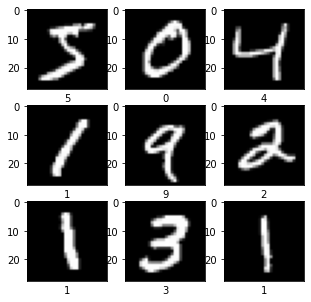

In [4]:
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary_r)

    plt.xlabel(train_labels[i])
plt.show()

## Prepare Dataset

In [5]:
### THE PAD HAS TO BE DONE IN THE
### POLAR SPACE

# 20 is the ceiling of (14 * sqrt(2)), to get length of diagonal of image, ensures we get all pixels in the image
# - mentioned in paper
X_train_polar = [cv.linearPolar(x, tuple(np.array(x.shape)/2), 20, cv.WARP_FILL_OUTLIERS) for x in train_images]
X_train_polar = [padImage(x, pixels=5) for x in X_train_polar]
X_train_polar = np.array(X_train_polar)[...,None]

X_test_polar = [cv.linearPolar(x, tuple(np.array(x.shape)/2), 20, cv.WARP_FILL_OUTLIERS) for x in test_images]
X_test_polar = [padImage(x, pixels=5) for x in X_test_polar]
X_test_polar = np.array(X_test_polar)[...,None]

# Rotate test set
X_test_r_polar = [tfa.image.rotate(x, np.random.uniform(-np.pi/2., np.pi/2.)).numpy() for x in test_images]
X_test_r_polar = [cv.linearPolar(x, tuple(np.array(x.shape)/2), 20, cv.WARP_FILL_OUTLIERS) for x in X_test_r_polar]
X_test_r_polar = [padImage(x, pixels=5) for x in X_test_r_polar]
X_test_r_polar = np.array(X_test_r_polar)[...,None]

## Dataset Visual Polar

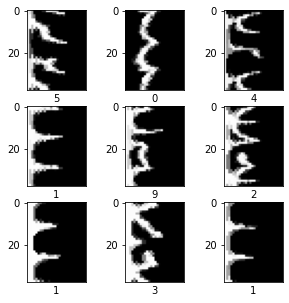

In [6]:
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    
    plt.grid(False)
    plt.imshow(X_train_polar[i], cmap=plt.cm.binary_r)

    plt.xlabel(train_labels[i])
plt.show()